<a href="https://colab.research.google.com/github/thotayogeswarreddy/TinyML_ECG_Data/blob/main/TinyECG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import wfdb
import numpy as np
import glob
import scipy.signal
import pandas as pd
from scipy.stats import entropy
#import tensorflow as tf
from scipy.stats import skew, kurtosis
import timeit
import os
from biosppy.signals import ecg
from sklearn import svm
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
pip install biosppy

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
#conversion
'''
from skl2onnx import convert_sklearn
from skl2onnx.common.data_types import FloatTensorType
import onnxmltools.utils
import onnxmltools
import joblib
'''

'\nfrom skl2onnx import convert_sklearn\nfrom skl2onnx.common.data_types import FloatTensorType\nimport onnxmltools.utils\nimport onnxmltools\nimport joblib\n'

In [ ]:
features=[]
labels=[]
DatabaseF=[]
WDatabase=[]
#trained_signals=[]
wn=0.1 #cutoff freq
beats=0
channel_number = 0 # Replace with the appropriate channel number for the signal of interest
#Database=['s0014lre','s0020are','s0015lre','s0017lre','s0021are','s0036lre','s0035_re','s0028lre','s0026lre','s0022lre']
Database = glob.glob('/content/drive/My Drive/TinyML/s0*')

for i in range(len(Database)):
  WDatabase.append(Database[i].split('.')[0])

DatabaseF = list(set(WDatabase))
print(list(DatabaseF))
print(len(DatabaseF))

ids=[i for i in range(len(DatabaseF))]

['/content/drive/My Drive/TinyML/s0387lre', '/content/drive/My Drive/TinyML/s0432_re', '/content/drive/My Drive/TinyML/s0535_re', '/content/drive/My Drive/TinyML/s0208lre', '/content/drive/My Drive/TinyML/s0210lre', '/content/drive/My Drive/TinyML/s0147lre', '/content/drive/My Drive/TinyML/s0303lre', '/content/drive/My Drive/TinyML/s0247lre', '/content/drive/My Drive/TinyML/s0083lre', '/content/drive/My Drive/TinyML/s0510_re', '/content/drive/My Drive/TinyML/s0156lre', '/content/drive/My Drive/TinyML/s0176_re', '/content/drive/My Drive/TinyML/s0302lre', '/content/drive/My Drive/TinyML/s0048_re', '/content/drive/My Drive/TinyML/s0225lre', '/content/drive/My Drive/TinyML/s0237lre', '/content/drive/My Drive/TinyML/s0132lre', '/content/drive/My Drive/TinyML/s0125lre', '/content/drive/My Drive/TinyML/s0442_re', '/content/drive/My Drive/TinyML/s0486_re', '/content/drive/My Drive/TinyML/s0500_re', '/content/drive/My Drive/TinyML/s0465_re', '/content/drive/My Drive/TinyML/s0339lre', '/content/

In [ ]:
def bw_filter(signal):
    b, a=scipy.signal.butter(4, wn, 'low', analog=False)
    filt_ecg=scipy.signal.filtfilt(b,a,signal)
    return filt_ecg

In [ ]:
def extract_features(pqrst_templates, id):
    global features, labels
    for i, template in enumerate(pqrst_templates):
        # Convert the template to a numpy array for easier calculations
        template_array = np.array(template)

        # Calculate the features
        mean_value = np.mean(template_array)

        variance_value = np.var(template_array)

        std_dev_value = np.std(template_array)

        median_value = np.median(template_array)

        peak_to_peak_interval = np.ptp(template_array)

        skewness_value = skew(template_array)

        kurtosis_value = kurtosis(template_array)
        zero_crossing_rate = (template_array[:-1] * template_array[1:] < 0).sum()

        # Append the features and label to the lists mean_value,peak_to_peak_interval,variance_value,skewness_value,std_dev_value,kurtosis_value,median_value,zero_crossing_rate
        features.append([peak_to_peak_interval,skewness_value,std_dev_value,variance_value,mean_value,median_value,kurtosis_value,zero_crossing_rate])
        labels.append(id)  # Append the id to the labels list

In [ ]:
for i in range(len(DatabaseF)):
        record_name = DatabaseF[i]
        record = wfdb.rdrecord(DatabaseF[i])
        signal = record.p_signal[:, channel_number]
        sampling_frequency = record.fs
        '''
        # Create a pandas DataFrame from the ECG signal list
        df = pd.DataFrame({"ECG Signal": signal})

        # Define the file path to save the CSV file
        csv_file_path = "/content/drive/My Drive/TinyML/CSV_Files/"+str(i)+".csv"

        # Save the DataFrame to a CSV file
        df.to_csv(csv_file_path, index=False)
        '''
        #filtered_signal= moving_average(signal, window_size)
        BWfilteredsignal= bw_filter(signal)
        processed_ecg = ecg.ecg(BWfilteredsignal, sampling_rate=sampling_frequency,show=False)
        filtered_signal =processed_ecg['filtered']
        r_peaks = processed_ecg['rpeaks']
        waves = ecg.extract_heartbeats(signal=filtered_signal, rpeaks=r_peaks, sampling_rate=sampling_frequency)
        #p_wave, q_wave, r_wave, s_wave, t_wave = waves['templates']
        templates_list = waves['templates']
        #print(record_name)
        beats=beats+len(templates_list)
        #print("No, of beats "+ str(len(templates_list)))
        #trained_signals.append(filtered_signal)
        #extract_features(templates_list, ids[i])
        # Create a pandas DataFrame from the ECG signal list
        #print(i, len(templates_list))
        '''
        for j in range(0,len(templates_list)):

          df = pd.DataFrame({"ECG Signal": templates_list[j]})
          folder_name = str(i)
          folder_path = os.path.join("/content/drive/My Drive/TinyML/test", folder_name)
          os.makedirs(folder_path, exist_ok=True)

          # Define the file path to save the CSV file
          csv_file_path = os.path.join(folder_path, f"{i}_B{j}.csv")

          # Save the DataFrame to a CSV file
          df.to_csv(csv_file_path, index=False)

'''
        %matplotlib inline
        %config InlineBackend.figure_format = 'retina'
        font = {'weight': 'bold',
        'size': 14}

        plt.figure(figsize=(12, 10))
        plt.subplot(3, 1, 1)
        plt.plot(signal, label='Original ECG Signal')
        plt.title('Original ECG Signal',fontdict=font)
        plt.xlabel('Sample Index',fontdict=font)
        plt.ylabel('Amplitude', fontdict=font)
        plt.legend(prop=font)

        plt.subplot(3, 1, 2)
        plt.plot(filtered_signal, label='Filtered ECG Signal')
        plt.title('Filtered ECG Signal',fontdict=font)
        plt.xlabel('Sample Index',fontdict=font)
        plt.ylabel('Amplitude',fontdict=font)
        plt.legend(prop=font)

        plt.subplot(3, 1, 3)
        for template in waves['templates']:
            plt.plot(template, label='Wave Template')
        plt.title('Segmented Waves (P, Q, R, S, T). Total segments or heart beats= ' +str(len(templates_list)),fontdict=font )
        plt.xlabel('Sample Index',fontdict=font)
        plt.ylabel('Amplitude',fontdict=font)
        plt.legend()

        plt.subplots_adjust(hspace = 1)
        plt.tight_layout()
        plt.show()

#print(beats)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
#data preparation
features = np.array(features)
labels = np.array(labels)

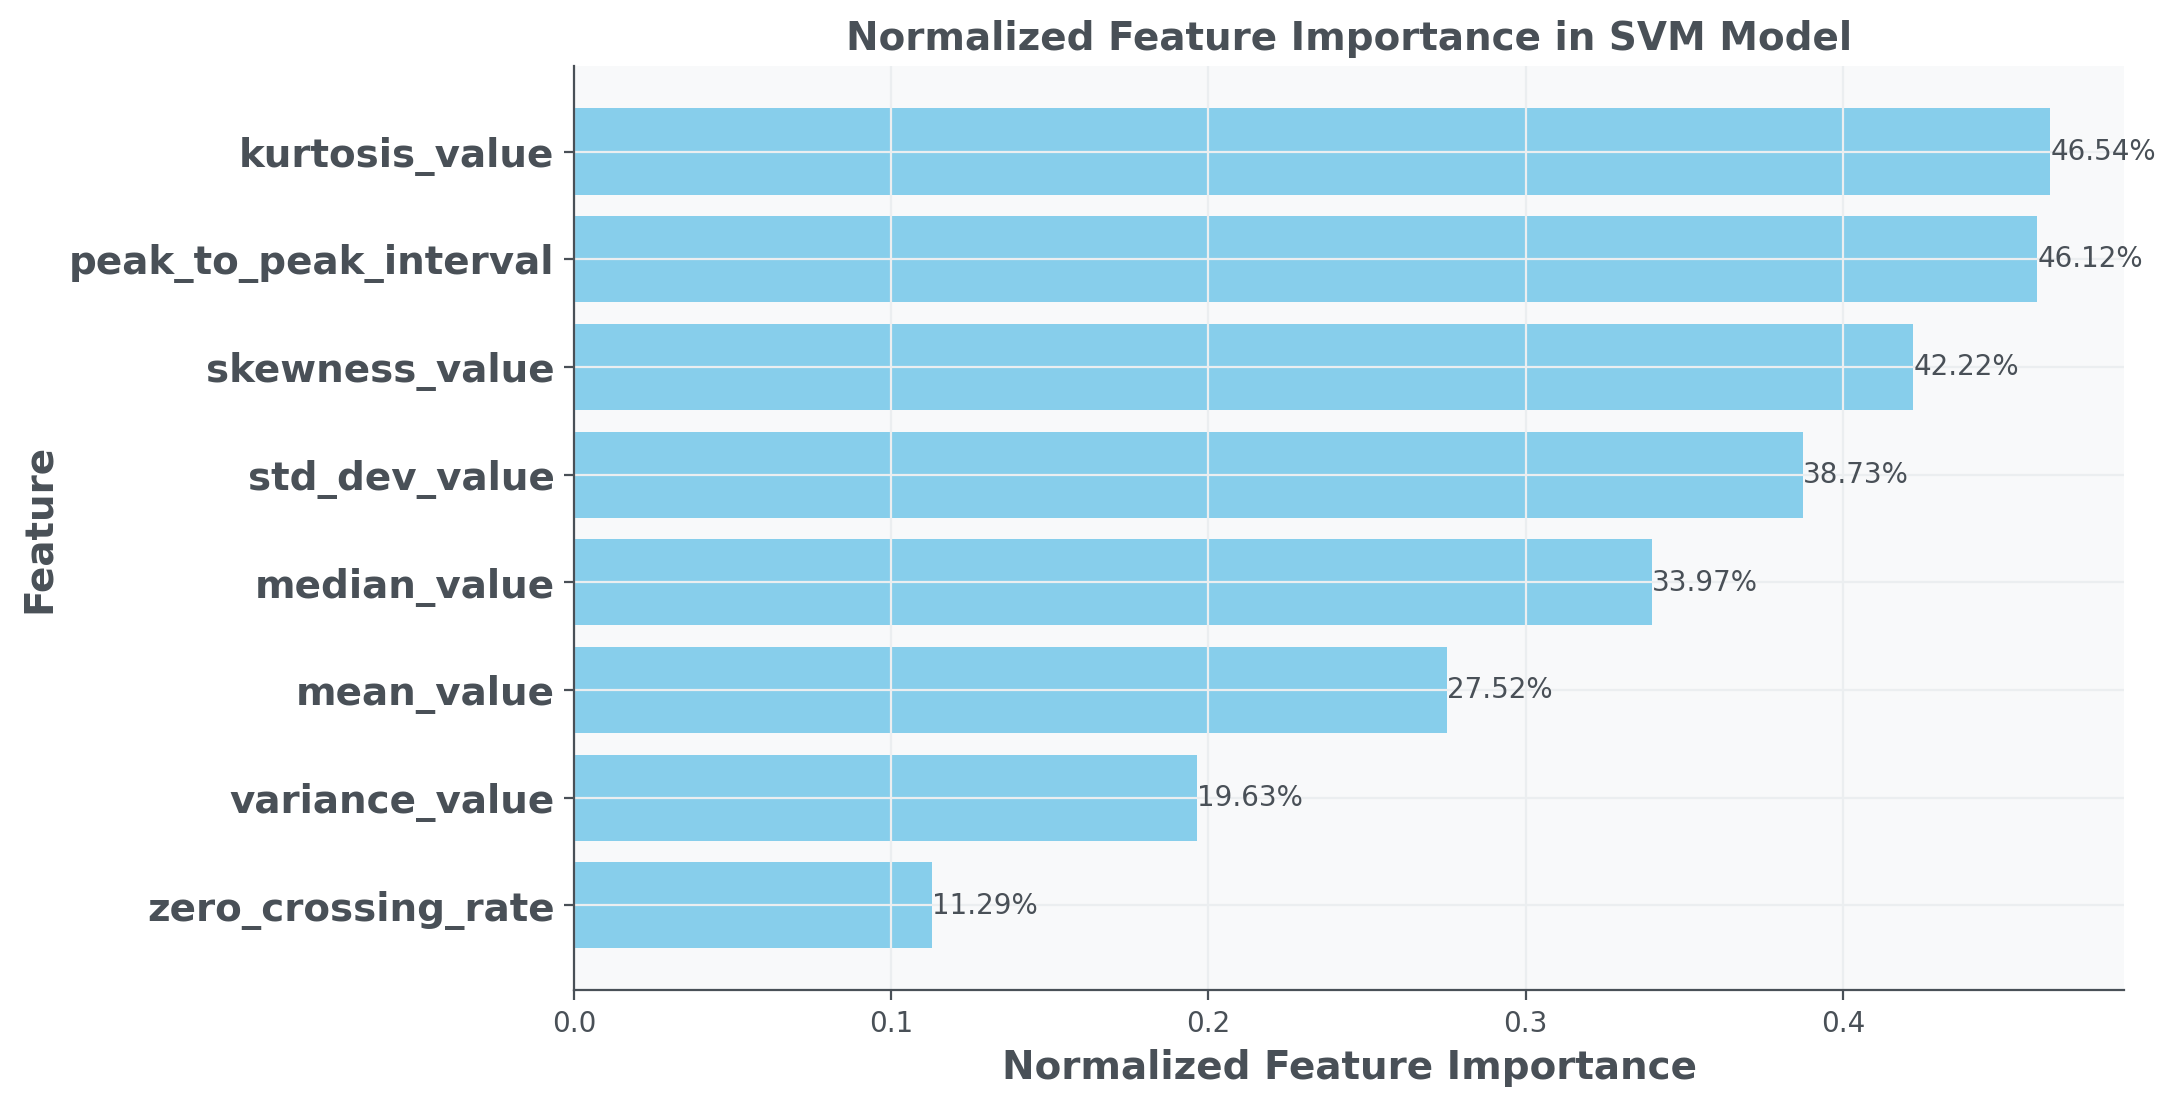

Model accuracy: 0.8767050721758708


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train the SVM model
model = svm.SVC(kernel='linear')  # You can experiment with different kernels ('linear', 'poly', 'rbf', etc.)
model.fit(X_train, y_train)

# Retrieve coefficients
coefficients = model

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=2, random_state=42)

# Extract normalized feature importance
normalized_importance = perm_importance.importances_mean / np.linalg.norm(perm_importance.importances_mean)

feature_names = ['peak_to_peak_interval','skewness_value','std_dev_value','variance_value','mean_value','median_value','kurtosis_value','zero_crossing_rate']

# Sort feature importance and feature names in descending order
sorted_indices = np.argsort(normalized_importance)[::-1]
sorted_importance = normalized_importance[sorted_indices]
sorted_feature_names = np.array(feature_names)[sorted_indices]

font = {'weight': 'bold',
        'size': 14}

plt.figure(figsize=(10, 6))
bars = plt.barh(np.arange(len(sorted_feature_names)), sorted_importance, color='skyblue')
plt.xlabel('Normalized Feature Importance', fontdict=font)
plt.ylabel('Feature', fontdict=font)
plt.title('Normalized Feature Importance in SVM Model', fontdict=font)
plt.yticks(np.arange(len(sorted_feature_names)), sorted_feature_names,fontdict=font)  # Set y-ticks to display feature names
plt.gca().invert_yaxis()  # Invert y-axis for better visualization
# Annotate each bar with its importance value
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{bar.get_width() * 100:.2f}%',
             va='center', ha='left')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
file_path = '/content/drive/My Drive/TinyML/plot.png'
plt.savefig(file_path)
plt.show()
'''
# Save the trained SVM model to a file using joblib
joblib.dump(model, '/content/drive/My Drive/TinyML/svm_model.pkl')

# Convert the scikit-learn model to ONNX format
initial_type = [('float_input', FloatTensorType([None, len(X_train[0])]))]
onnx_model = convert_sklearn(model, initial_types=initial_type)

# Save the ONNX model to a file
onnxmltools.utils.save_model(onnx_model, '/content/drive/My Drive/TinyML/svm_model.onnx')
'''

# Test the model
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Calculate sensitivity and specificity for each class
sensitivity_per_class = []
specificity_per_class = []
for i in range(conf_matrix.shape[0]):
    tp = conf_matrix[i, i]
    fn = np.sum(conf_matrix[i, :]) - tp
    fp = np.sum(conf_matrix[:, i]) - tp
    tn = np.sum(conf_matrix) - tp - fn - fp

    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)

    sensitivity_per_class.append(sensitivity)
    specificity_per_class.append(specificity)

# Calculate average sensitivity and specificity across all classes
average_sensitivity = np.mean(sensitivity_per_class)
average_specificity = np.mean(specificity_per_class)

print("Average Sensitivity:", average_sensitivity)
print("Average Specificity:", average_specificity)


Average Sensitivity: 0.3663663353402864
Average Specificity: 0.9980075949388846


In [ ]:
import os

# Check the current working directory
current_directory = os.getcwd()
print("Current Working Directory:", current_directory)

Current Working Directory: /content


In [ ]:
pip install scikit-learn onnxmltools onnx

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 329.0/329.0 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 16.1 MB/s eta 0:00:00


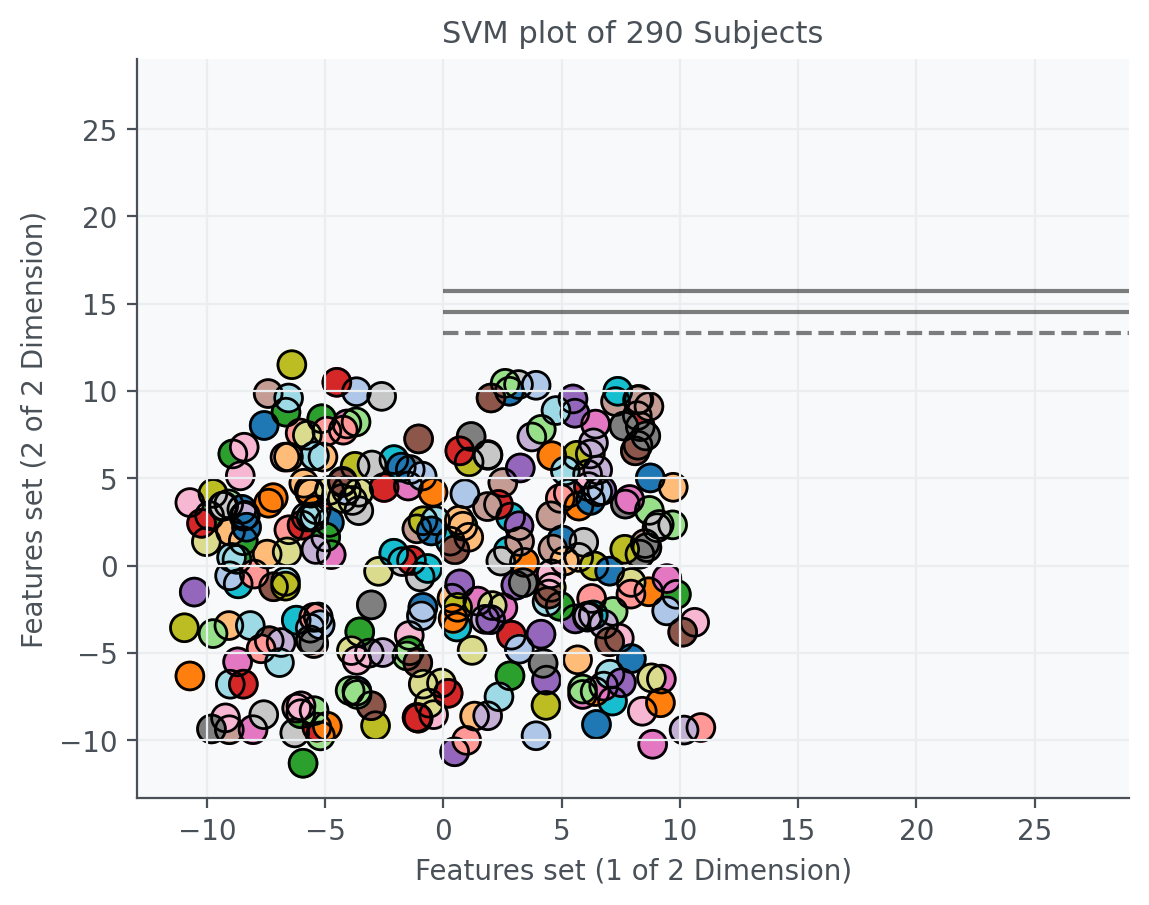

In [ ]:
X, y = make_blobs(n_samples=290, centers=290, random_state=6)
clf = svm.SVC(kernel='linear', C=1000)
clf.fit(X, y)  # Train the classifier

# Scatter data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap=plt.cm.tab20)

# Plot decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
#Z = clf.decision_function(xy)
#Z = Z.reshape(XX.shape)
# Plot decision boundary and margins
ax.contour(XX, YY, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           facecolors='none', edgecolors='k', marker='o')

# Add labels and title
plt.title('SVM plot of 290 Subjects')
plt.xlabel('Features set (1 of 2 Dimension)')
plt.ylabel('Features set (2 of 2 Dimension)')

# Modify legend to represent your five ECG signal classes
'''
class_1 = plt.scatter([], [], s=30, marker='o', color=plt.cm.Paired(0))
class_2 = plt.scatter([], [], s=30, marker='o', color=plt.cm.Paired(1))
class_3 = plt.scatter([], [], s=30, marker='o', color=plt.cm.Paired(2))
class_4 = plt.scatter([], [], s=30, marker='o', color=plt.cm.Paired(3))
class_5 = plt.scatter([], [], s=30, marker='o', color=plt.cm.Paired(4))
class_6 = plt.scatter([], [], s=30, marker='o', color=plt.cm.Paired(5))
plt.legend((class_1, class_2, class_3, class_4, class_5), ('ECG Signal 1', 'ECG Signal 2', 'ECG Signal 3', 'ECG Signal 4', 'ECG Signal 5'), title="Classes")
'''
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.show()

In [ ]:
import cProfile

cProfile.run('extract_features')

         3 function calls in 0.000 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.000    0.000 <string>:1(<module>)
        1    0.000    0.000    0.000    0.000 {built-in method builtins.exec}
        1    0.000    0.000    0.000    0.000 {method 'disable' of '_lsprof.Profiler' objects}




In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [ ]:
#model creation
model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
#model compliance
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
#model training
model.fit(features_train, labels_train, epochs=100)

In [ ]:
#model accuracy
loss, accuracy = model.evaluate(features_test, labels_test)
print(f'Accuracy: {accuracy}')

3/3 [==============================] - 0s 4ms/step - loss: -32049.3809 - accuracy: 0.5231
Accuracy: 0.5230769515037537


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
